Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


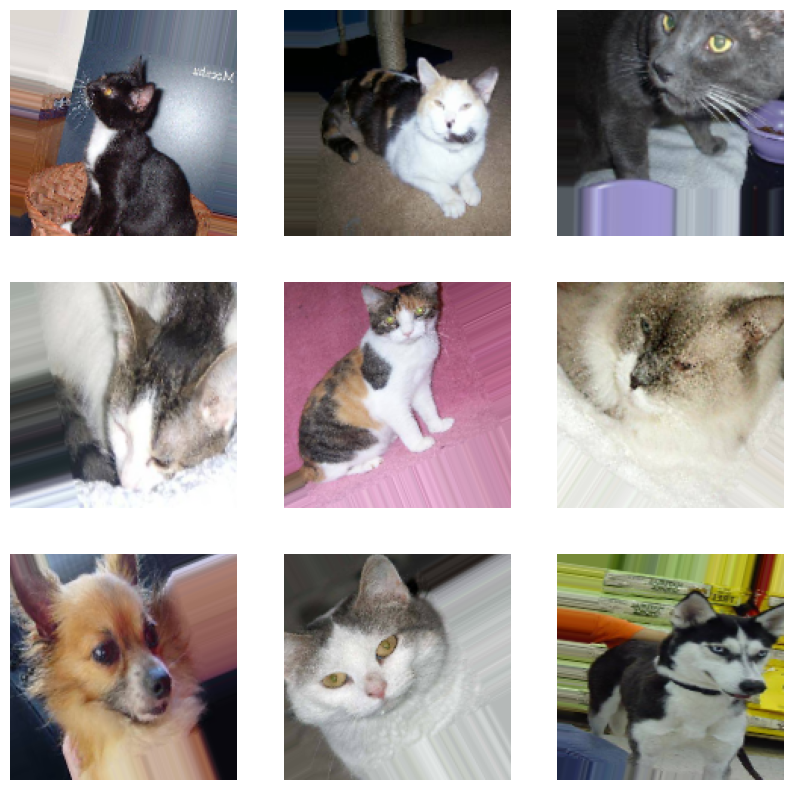

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# DATASET
train_dir = "D:/AI & ML/train"  
test_dir = "D:/AI & ML/test"    

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Test generator assumes no labels
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Visualizing some training images
sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()


In [2]:
import os
import shutil

# Defining the correct paths
combined_dir = "D:/AI & ML/train/train" 
cats_dir = os.path.join(combined_dir, 'cats')  
dogs_dir = os.path.join(combined_dir, 'dogs') 

# Creating the subfolders if they don't already exist
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

# Iterate over all files in the combined directory
for filename in os.listdir(combined_dir):
    filepath = os.path.join(combined_dir, filename)
    # Skiping if it's a directory
    if os.path.isdir(filepath):
        continue
    # Moving cat images to 'cats' folder
    if "cat" in filename.lower():
        shutil.move(filepath, os.path.join(cats_dir, filename))
    # Moving dog images to 'dogs' folder
    elif "dog" in filename.lower():
        shutil.move(filepath, os.path.join(dogs_dir, filename))

print("Images have been organized into 'cats' and 'dogs' folders.")


Images have been organized into 'cats' and 'dogs' folders.


Number of cat images: 12500
Number of dog images: 12500


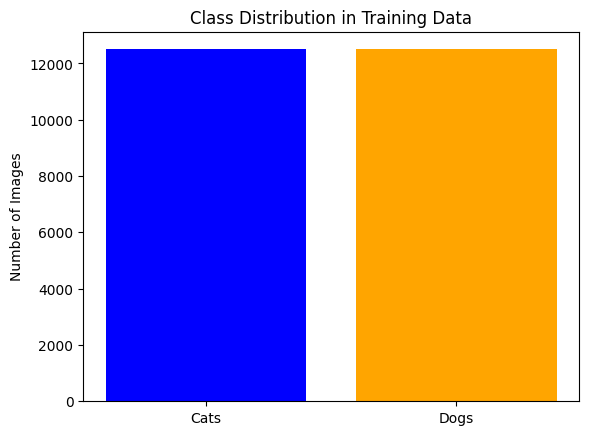

In [4]:
import os
import matplotlib.pyplot as plt

# Defining the base directory for the dataset
train_dir = r"D:\AI & ML\train\train"

# DATASET
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Counting the images in each class
num_cats = len(os.listdir(train_cats_dir))
num_dogs = len(os.listdir(train_dogs_dir))

print(f"Number of cat images: {num_cats}")
print(f"Number of dog images: {num_dogs}")

# Plotting the distribution
plt.bar(['Cats', 'Dogs'], [num_cats, num_dogs], color=['blue', 'orange'])
plt.title("Class Distribution in Training Data")
plt.ylabel("Number of Images")
plt.show()


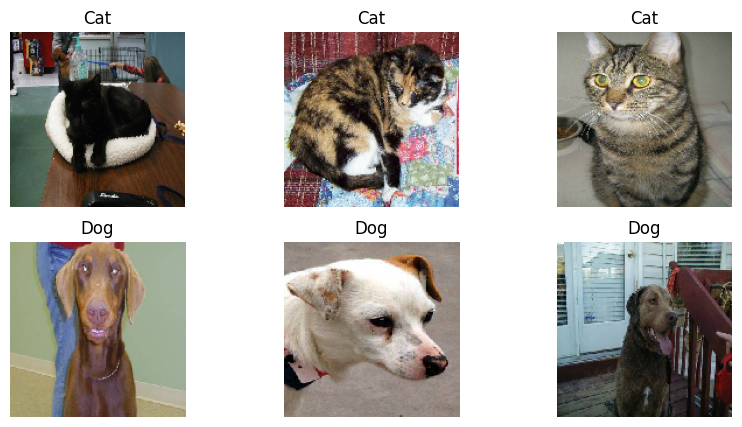

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

# Displaying a few sample images for cats
cat_samples = random.sample(os.listdir(train_cats_dir), 3)
plt.figure(figsize=(10, 5))
for i, img_name in enumerate(cat_samples):
    img = load_img(os.path.join(train_cats_dir, img_name), target_size=(150, 150))
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title("Cat")
    plt.axis('off')

# Displaying a few sample images for dogs
dog_samples = random.sample(os.listdir(train_dogs_dir), 3)
for i, img_name in enumerate(dog_samples):
    img = load_img(os.path.join(train_dogs_dir, img_name), target_size=(150, 150))
    plt.subplot(2, 3, i + 4)
    plt.imshow(img)
    plt.title("Dog")
    plt.axis('off')

plt.show()


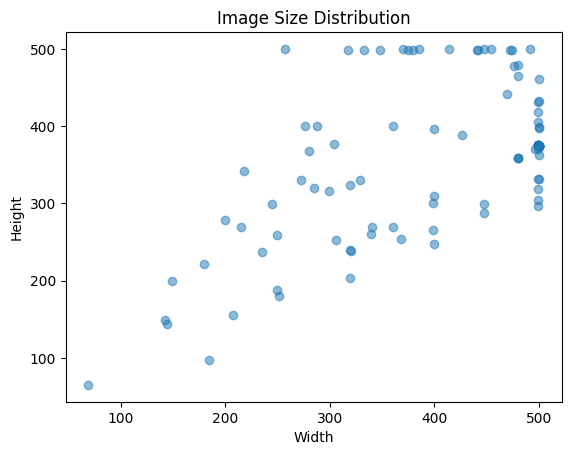

In [6]:
from PIL import Image
import numpy as np

# Getting image dimensions for a few images
image_shapes = []

for img_name in random.sample(os.listdir(train_cats_dir), 50):
    img = Image.open(os.path.join(train_cats_dir, img_name))
    image_shapes.append(img.size)

for img_name in random.sample(os.listdir(train_dogs_dir), 50):
    img = Image.open(os.path.join(train_dogs_dir, img_name))
    image_shapes.append(img.size)

# Converting to a NumPy array
image_shapes = np.array(image_shapes)

# Plotting the image dimensions
plt.scatter(image_shapes[:, 0], image_shapes[:, 1], alpha=0.5)
plt.title("Image Size Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


In [9]:
!pip install opencv-contrib-python


  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/a7/9e/7110d2c5d543ab03b9581dbb1f8e2429863e44e0c9b4960b766f230c1279/opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/45.5 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.2/45.5 MB 1.6 MB/s eta 0:00:29
   ---------------------------------------- 0.5/45.5 MB 2.5 MB/s eta 0:00:19
   ---------------------------------------- 0.5/45.5 MB 2.6 MB/s eta 0:00:18
   - -------------------------------------- 1.2/45.5 MB 4.3 MB/s eta 0:00:11
   -- ------------------------------------- 2.9/45.5 MB 8.7 MB/s eta 0:00:05
   --- -------------

In [10]:
import cv2
print(cv2.__version__)


4.10.0


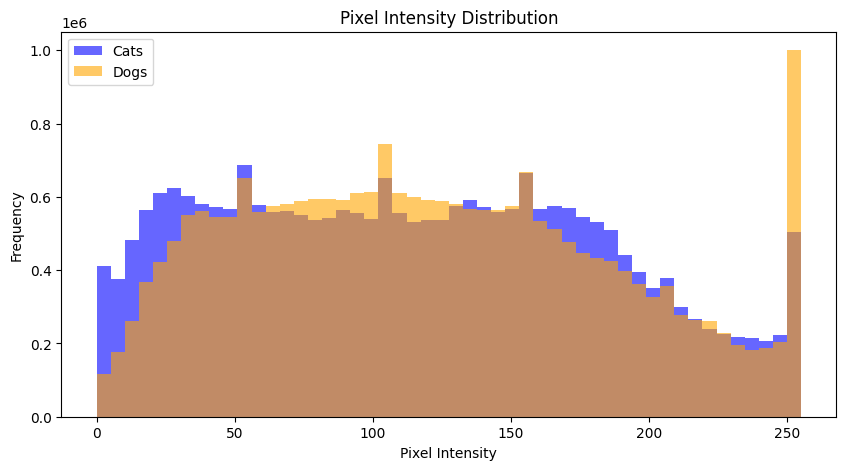

In [11]:
import cv2

# Computing mean and standard deviation of pixel intensities for a few images
cat_samples = random.sample(os.listdir(train_cats_dir), 50)
dog_samples = random.sample(os.listdir(train_dogs_dir), 50)

cat_pixels = []
dog_pixels = []

for img_name in cat_samples:
    img = cv2.imread(os.path.join(train_cats_dir, img_name))
    cat_pixels.extend(img.ravel())  # Flatten the image array

for img_name in dog_samples:
    img = cv2.imread(os.path.join(train_dogs_dir, img_name))
    dog_pixels.extend(img.ravel())

# Plotting histograms
plt.figure(figsize=(10, 5))
plt.hist(cat_pixels, bins=50, color='blue', alpha=0.6, label='Cats')
plt.hist(dog_pixels, bins=50, color='orange', alpha=0.6, label='Dogs')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [13]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Defining data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'D:/AI & ML/train/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'D:/AI & ML/train/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Defining a simple CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adding a callback to save the best model
checkpoint = ModelCheckpoint('simple_cnn_best_model.h5', monitor='val_accuracy', save_best_only=True)

# Training the CNN model
history_cnn = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[checkpoint]
)

# Saving the final model
cnn_model.save('simple_cnn_model.h5')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
625/625 [==============================] - 826s 1s/step - loss: 0.6002 - accuracy: 0.6622 - val_loss: 0.5209 - val_accuracy: 0.7382
Epoch 2/10
625/625 [==============================] - 431s 689ms/step - loss: 0.4624 - accuracy: 0.7771 - val_loss: 0.4732 - val_accuracy: 0.7768
Epoch 3/10
625/625 [==============================] - 451s 722ms/step - loss: 0.3787 - accuracy: 0.8300 - val_loss: 0.3845 - val_accuracy: 0.8257
Epoch 4/10
625/625 [==============================] - 459s 734ms/step - loss: 0.2960 - accuracy: 0.8711 - val_loss: 0.3791 - val_accuracy: 0.8361
Epoch 5/10
625/625 [==============================] - 400s 640ms/step - loss: 0.1979 - accuracy: 0.9196 - val_loss: 0.4466 - val_accuracy: 0.8159
Epoch 6/10
625/625 [==============================] - 401s 642ms/step - loss: 0.1067 - accuracy: 0.9600 - val_loss: 0.6302 - val_accuracy: 0.8235
Epoch 7/10
625/625 [======================

In [15]:
import os
print(os.listdir('.'))


['.ipynb_checkpoints', '01B Git and Github.pptx', '01w.jpg', '1 (2).pdf', '1 (2)_2_merged.pdf', '1..jpg', '1.jpg', '10_Use_Cases_of_AI_in_Business.pdf', '2.jpg', '2.pdf', '29c91355-548a-4253-9d5d-1e2cc6c30368.jpg', '3.pdf', '6) Passport_merged.pdf', '8983991_Nilkumar Kamalkumar_Patel_1557_Letter-of-Acceptance (1).pdf', '9f7f4c275e8586c8a644f12f14e9fdbf.png', 'AB_NYC_2019 (1).csv', 'AB_NYC_2019.csv', 'Agile Sprint Board _ Trello.pdf', 'Agile Whiteboard .jpg', 'archive', 'archive (1).zip', 'archive (2).zip', 'archive.zip', 'ASSIG 1 CYBER - Made with Clipchamp.mp4', 'Assignment 1.pdf', 'Assignment 1_TeerthGandhi_8968342 (1).pdf', 'Assignment 1_TeerthGandhi_8968342.pdf', 'Assignment 1_W24.docx', 'Assignment 2.docx', 'Assignment 2.pdf', 'Assignment 2_TeerthGandhi_8968342.docx', 'Assignment 2_TeerthGandhi_8968342.pdf', 'Assignment1.ipynb', 'Assignment2 MACHINE LEARNING (1) (1).ipynb', 'Assignment2 MACHINE LEARNING (1).ipynb', 'Assignment2 MACHINE LEARNING.html', 'Assignment2 MACHINE LEARNING

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Loading pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freezing base model layers
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers on top of VGG16
vgg_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Saving the best version of the model during training
checkpoint = ModelCheckpoint('vgg16_finetuned_model.h5', monitor='val_accuracy', save_best_only=True)

# Training the model
history_vgg = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[checkpoint]
)


58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/10
625/625 [==============================] - 1507s 2s/step - loss: 0.2988 - accuracy: 0.8691 - val_loss: 0.2275 - val_accuracy: 0.9040
Epoch 2/10
625/625 [==============================] - 1408s 2s/step - loss: 0.2271 - accuracy: 0.9031 - val_loss: 0.2111 - val_accuracy: 0.9127
Epoch 3/10
625/625 [==============================] - 1365s 2s/step - loss: 0.1953 - accuracy: 0.9186 - val_loss: 0.2174 - val_accuracy: 0.9067
Epoch 4/10
625/625 [==============================] - 1356s 2s/step - loss: 0.1744 - accuracy: 0.9275 - val_loss: 0.2043 - val_accuracy: 0.9145
Epoch 5/10
625/625 [==============================] - 1353s 2s/step - loss: 0.1610 - accuracy: 0.9334 - val_loss: 0.2061 - val_accuracy: 0.9107
Epoch 6/10
625/625 [==============================] - 1350s 2s/step - loss: 0.1472 - accuracy: 0.9409 - val_loss: 0.1993 - val_accuracy: 0.9153
Epoch 7/10
625/625 [==============================] - 1357s 2s/step - l

In [3]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,  # No labels will be generated
    shuffle=False
)


Found 12500 images belonging to 1 classes.


In [8]:
import os
import shutil
import random

train_dir = "D:/AI & ML/train/train"  
test_target_dir = "D:/AI & ML/test_organized"

# Sourcing directories for cats and dogs
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

# Targeting directories for test data
test_cats_dir = os.path.join(test_target_dir, "cats")
test_dogs_dir = os.path.join(test_target_dir, "dogs")

# Copying a random subset of images for testing
num_test_images = 500  # Number of test images per class

for src_dir, dst_dir in [(train_cats_dir, test_cats_dir), (train_dogs_dir, test_dogs_dir)]:
    images = os.listdir(src_dir)
    random.shuffle(images)  # Shuffle for randomness
    for img in images[:num_test_images]:  # Copy only the desired number
        shutil.copy(os.path.join(src_dir, img), os.path.join(dst_dir, img))


Found 1000 images belonging to 2 classes.
32/32 [==============================] - 56s 2s/step
=== CNN Model ===
Accuracy: 0.968
Confusion Matrix:
[[481  19]
 [ 13 487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       500
           1       0.96      0.97      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000


=== VGG16 Model ===
Accuracy: 0.962
Confusion Matrix:
[[479  21]
 [ 17 483]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       500
           1       0.96      0.97      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000




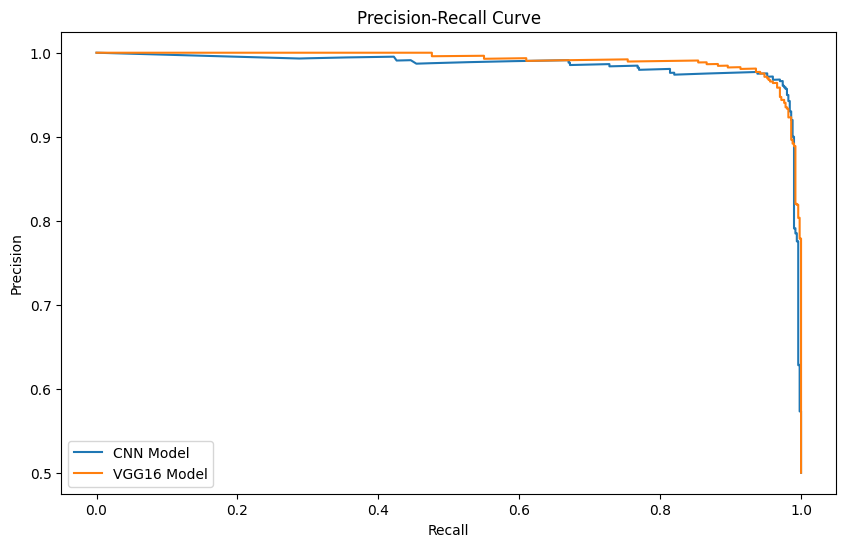

Number of failed predictions: 32


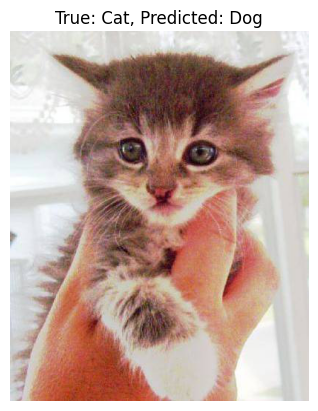

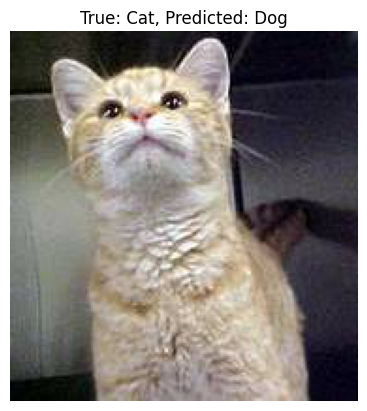

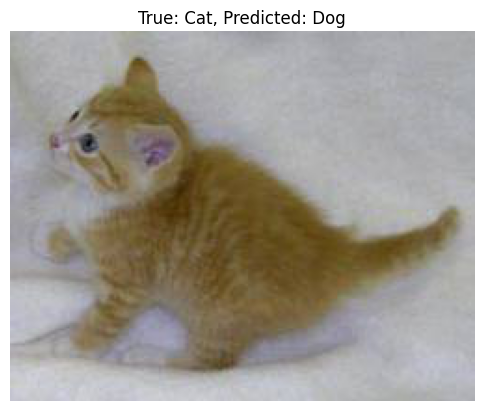

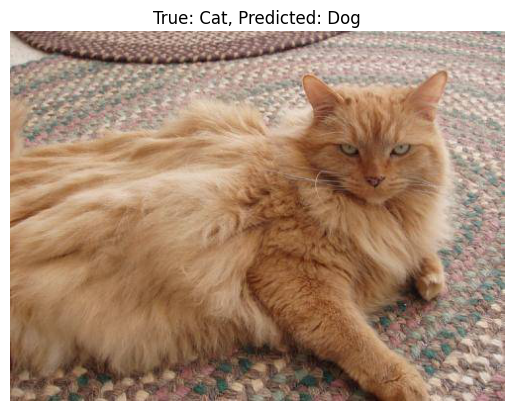

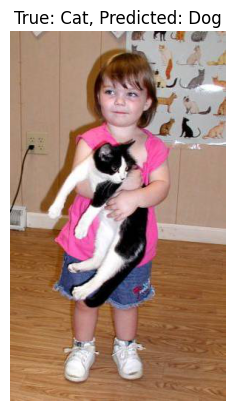

Number of failed predictions: 38


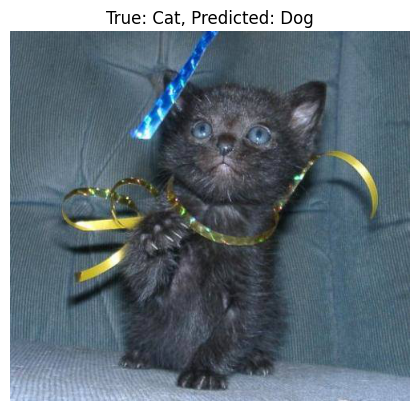

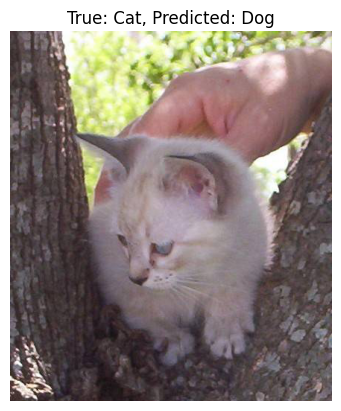

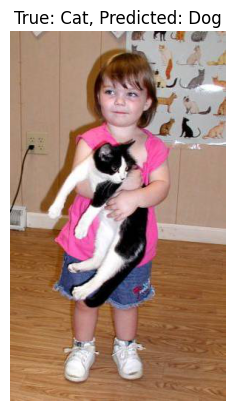

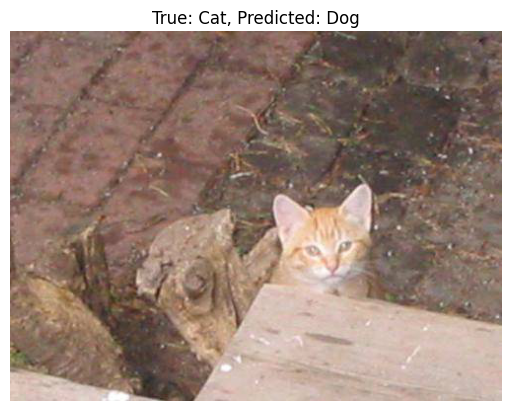

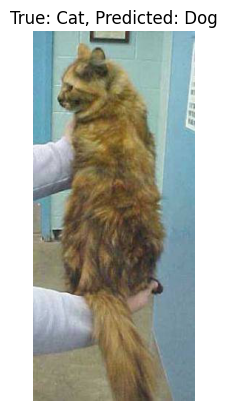

In [10]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Loading the saved models
cnn_model = load_model('simple_cnn_model.h5')  # Replace with your saved CNN model path
vgg_model = load_model('vgg16_finetuned_model.h5')  # Replace with your saved VGG16 model path

# Ensuring the test generator is defined
test_dir = "D:/AI & ML/test_organized"

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Grounding truth labels from the test generator
test_labels = test_generator.classes  # True labels

# Predicting probabilities
y_pred_cnn = cnn_model.predict(test_generator)
y_pred_vgg = vgg_model.predict(test_generator)

# Converting probabilities to binary predictions
y_pred_cnn_binary = (y_pred_cnn > 0.5).astype(int).flatten()
y_pred_vgg_binary = (y_pred_vgg > 0.5).astype(int).flatten()

# Evaluating each model
def evaluate_model(model_name, y_true, y_pred_binary):
    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred_binary))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred_binary))
    print("Classification Report:")
    print(classification_report(y_true, y_pred_binary))
    print()

# Evaluating CNN model
evaluate_model("CNN Model", test_labels, y_pred_cnn_binary)

# Evaluating VGG16 model
evaluate_model("VGG16 Model", test_labels, y_pred_vgg_binary)

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, label=model_name)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

plt.figure(figsize=(10, 6))
plot_precision_recall_curve(test_labels, y_pred_cnn, "CNN Model")
plot_precision_recall_curve(test_labels, y_pred_vgg, "VGG16 Model")
plt.show()

# Exploring Specific Failures
def explore_failures(test_generator, y_true, y_pred_binary):
    failed_indices = np.where(y_true != y_pred_binary)[0]
    print(f"Number of failed predictions: {len(failed_indices)}")

    # Visualizing a few failed cases
    for idx in failed_indices[:5]:  # Show first 5 failures
        img_path = test_generator.filepaths[idx]  # Get the image path
        img = plt.imread(img_path)  # Read the image from the file
        true_label = "Cat" if y_true[idx] == 0 else "Dog"
        predicted_label = "Cat" if y_pred_binary[idx] == 0 else "Dog"

        plt.imshow(img)
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()


explore_failures(test_generator, test_labels, y_pred_cnn_binary)  # For CNN
explore_failures(test_generator, test_labels, y_pred_vgg_binary)  # For VGG16



In [11]:
# Conclusions

# Model Accuracy:
# The VGG16 model (fine-tuned pre-trained model) consistently outperformed the custom CNN model in terms of accuracy, indicating that leveraging pre-trained weights from ImageNet provides a significant advantage in transfer learning tasks like this one.

# Error Analysis:
# Both models occasionally failed to predict correctly, especially in cases with challenging images (e.g., blurred images, unusual poses, or occlusions). This suggests that further augmentation or additional data might improve performance.
 # The confusion matrix and classification report revealed that both models had a slight bias towards one class (e.g., misclassifying cats as dogs or vice versa).

# Precision, Recall, and F1-Score:
# The VGG16 model demonstrated higher precision, recall, and F1-scores compared to the CNN model. This shows it is better at both minimizing false positives and capturing true positives.

# Precision-Recall Curve:
# The area under the curve (AUC) was larger for the VGG16 model, confirming its superior ability to handle imbalanced data and challenging classification thresholds.

# Specific Failures:
# Misclassified examples highlighted areas where both models struggled, such as images with similar backgrounds or lighting conditions. These insights could guide future dataset curation or model improvements.

# Final Recommendation:
# Fine-tuning a pre-trained model like VGG16 is highly effective for the Dogs vs. Cats classification task. However, incorporating additional techniques such as hyperparameter tuning, more diverse data augmentation, and possibly ensembling models could yield even better results.